In [11]:
import chainer
import numpy as np
from chainer import cuda, optimizers, serializers, utils, gradient_check, Variable
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

import numpy as np
from sklearn import datasets

In [12]:
iris = datasets.load_iris()

In [13]:
class MyAE(Chain):
    def __init__(self):
        super(MyAE, self).__init__(
            l1 = L.Linear(4, 2),
            l2 = L.Linear(2, 4),
        )
        
    def __call__(self, x):
        bv = self.fwd(x)
        return F.mean_squared_error(bv, x)
    
    def fwd(self, x):
        fv = F.sigmoid(self.l1(x))
        bv = self.l2(fv)
        return bv

In [14]:
model = MyAE()
optimizer = optimizers.SGD()
optimizer.setup(model)

In [16]:
n = 150
bs = 30
for j in range(3000):
    sffindx = np.random.permutation(n)
    for i in range(0, n, bs):
        x = Variable(xtrain[sffindx[i:(i+bs) if (i+bs) < n else n]])
        model.zerograds()
        loss = model(x)
        loss.backward()
        optimizer.update()

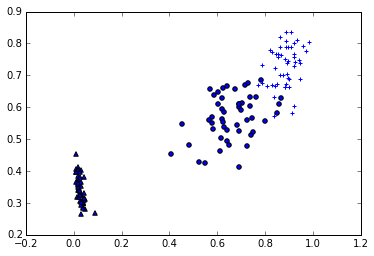

In [20]:
import matplotlib.pyplot as plt
x = Variable(xtrain)
yt = F.sigmoid(model.l1(x))
ans = yt.data
ansx1 = ans[0:50, 0]
ansy1 = ans[0:50, 1]

ansx2 = ans[50:100, 0]
ansy2 = ans[50:100, 1]

ansx3 = ans[100:150, 0]
ansy3 = ans[100:150, 1]

plt.scatter(ansx1, ansy1, marker="^")
plt.scatter(ansx2, ansy2, marker="o")
plt.scatter(ansx3, ansy3, marker="+")
plt.show()